## Import

In [1]:
import pandas as pd
import geopandas as gpd
import folium 

In [2]:
# Set filepath
fp = "/workspaces/codespaces-jupyter/data/North California/gis_osm_transport_free_1.shp"
transport_locations = gpd.read_file(fp)

In [3]:
# Set filepath
fp = "/workspaces/codespaces-jupyter/data/County of Santa Clara/geo_export_742a7eac-9364-4734-a083-fd8f554cf8ca.shp"
santa_clara_county_boundaries = gpd.read_file(fp)

In [4]:
type(transport_locations)

geopandas.geodataframe.GeoDataFrame

In [5]:
print(transport_locations.crs)

EPSG:4326


In [6]:
transport_locations.head(10)

,osm_id,code,fclass,name,geometry
0,30236493,5601,railway_station,San Antonio,POINT (-122.10724 37.40741)
1,30236612,5601,railway_station,Mountain View,POINT (-122.07588 37.39434)
2,53023702,5601,railway_station,Rockridge,POINT (-122.25126 37.84476)
3,57792672,5601,railway_station,Concord,POINT (-122.02907 37.97378)
4,57810647,5601,railway_station,Richmond,POINT (-122.35360 37.93687)
5,62538047,5602,railway_halt,Pantano,POINT (-121.88384 38.13803)
6,87362056,5602,railway_halt,Latrobe,POINT (-120.98695 38.56290)
7,90138751,5621,bus_stop,NaN,POINT (-121.31281 38.77474)
8,90408338,5602,railway_halt,Hampton,POINT (-121.11106 38.64463)
9,95327721,5601,railway_station,Ashby,POINT (-122.26971 37.85298)


In [7]:
print("BEFORE:", santa_clara_county_boundaries.crs)

santa_clara_county_boundaries = santa_clara_county_boundaries.to_crs(epsg= 4326)

print("AFTER:", santa_clara_county_boundaries.crs)

BEFORE: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
AFTER: EPSG:4326


In [8]:
santa_clara_county_boundaries

,acres,objectid,shape_area,shape_leng,sq_miles,y,geometry
0,835109.926034,2.0,3.637739e+10,1.132440e+06,1304.85926,Y,"POLYGON ((-121.74467 37.48386, -121.70037 37.4..."


<Axes: >

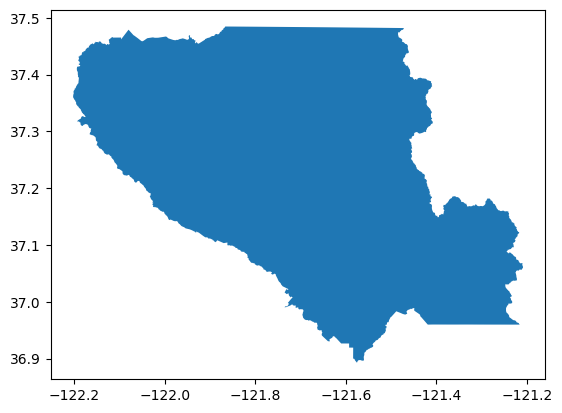

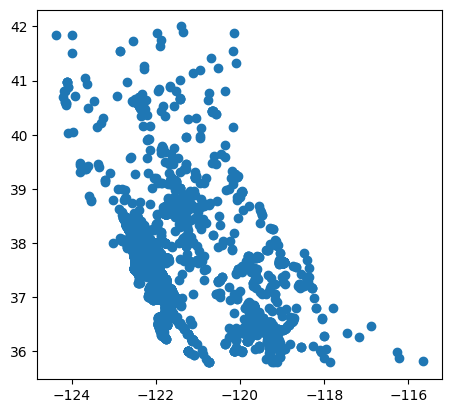

In [9]:
santa_clara_county_boundaries.plot()
transport_locations.plot()

In [10]:
# take transport location within santa clara county boundaries
%time transport_location_is_in_santa_clara = transport_locations.apply(lambda x: gpd.GeoSeries(x.geometry, crs=4326).within(santa_clara_county_boundaries), axis=1)

In [ ]:
transport_locations['transport_location_is_in_santa_clara'] = transport_location_is_in_santa_clara

In [ ]:
transport_location_is_in_santa_clara.value_counts()

False    17601
True      3619
dtype: int64

In [ ]:
santa_clara_transport_locations = transport_locations.where(transport_locations.transport_location_is_in_santa_clara == True) \
.dropna() \
.drop(labels='transport_location_is_in_santa_clara', axis=1)

In [ ]:
santa_clara_transport_locations

,osm_id,code,fclass,name,geometry
0,30236493,5601.0,railway_station,San Antonio,POINT (-122.10724 37.40741)
1,30236612,5601.0,railway_station,Mountain View,POINT (-122.07588 37.39434)
16,266800225,5621.0,bus_stop,El Camino Real & East Remington Drive,POINT (-122.02439 37.36102)
18,266910711,5601.0,railway_station,Capitol,POINT (-121.84176 37.28397)
19,266944543,5601.0,railway_station,Morgan Hill,POINT (-121.65053 37.12970)
...,...,...,...,...,...
20503,9632354205,5621.0,bus_stop,Bus Stop #2,POINT (-121.92957 37.37230)
20504,9632354206,5621.0,bus_stop,Bus Stop #3,POINT (-121.92775 37.37190)
20505,9632354207,5621.0,bus_stop,Bus Stop #4,POINT (-121.92854 37.37317)
20506,9632354208,5621.0,bus_stop,Bus Stop #5,POINT (-121.92973 37.37373)


### Save santa clara data

In [24]:
santa_clara_transport_locations.fclass.unique()

array(['railway_station', 'bus_stop', 'bus_station', 'helipad',
       'railway_halt', 'taxi'], dtype=object)

In [25]:
santa_clara_transport_locations[santa_clara_transport_locations.fclass == 'helipad']

,osm_id,code,fclass,name,geometry
164,369169641,5655.0,helipad,Canyon Creek Heliport,POINT (-121.79834 37.10808)
205,369170222,5655.0,helipad,McCandless Towers Heliport,POINT (-121.97243 37.38554)
3100,3196069915,5655.0,helipad,Alma Helitack Base,POINT (-121.99060 37.18357)


In [17]:
# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in santa_clara_transport_locations.geometry]

In [18]:
# OpenStreetMap
map = folium.Map(location=[37.335480, -121.893028], tiles="OpenStreetMap", zoom_start=12)
for point in range(len(santa_clara_transport_locations)):
    folium.Circle(geo_df_list[point]).add_to(map)
map